<a href="https://colab.research.google.com/github/Manasipotade/Capstone-Project/blob/master/MFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
invoice = pd.read_csv('drive/My Drive/capstone/invoice.csv')
customer = pd.read_csv('drive/My Drive/capstone/customer.csv')
plant = pd.read_csv('drive/My Drive/capstone/plant.csv')
vehicles = pd.read_csv('drive/My Drive/capstone/vehicles.csv')
jtd= pd.read_csv('drive/My Drive/capstone/jtd.csv') 

In [5]:
print('invoice:\n   ',invoice.columns)
print('customer:\n  ',customer.columns)
print('plant:\n  ',plant.columns)
print('Vehicle:\n   ',vehicles.columns)
print('JTD:\n   ',jtd.columns)

invoice:
    Index(['Unnamed: 0', 'Amt Rcvd From Custom', 'Amt Rcvd From Ins Co',
       'Area / Locality', 'CGST(14%)', 'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)',
       'CITY', 'Cash /Cashless Type', 'Claim No.', 'Cust Type', 'Customer No.',
       'District', 'Expiry Date', 'Gate Pass Date', 'Gate Pass Time',
       'IGST(12%)', 'IGST(18%)', 'IGST(28%)', 'IGST(5%)', 'Insurance Company',
       'Invoice Date', 'Invoice No', 'Invoice Time', 'Job Card No',
       'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
       'Outstanding Amt', 'Parts Total', 'Pin code', 'Plant', 'Plant Name1',
       'Policy no.', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
       'Service Advisor Name', 'TDS amount', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total CGST', 'Total GST', 'Total IGST',
       'Total SGST/UGST', 'Total Value', 'Use

## Missing value

In [0]:
def get_missingvalues(df):
#   dff =  df.isnull().sum() * 100 / len(df)
#   return dff.sort_values(ascending = False)
  count = df.isnull().sum().sort_values(ascending = False)
  percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
  # df[column].isnull().sum()
  missing_values = pd.concat([count, percent], axis=1, keys=['Count', 'Percent'])
  return missing_values

In [7]:
get_missingvalues(customer)

,Count,Percent
Death date,554675,99.880613
Date of Birth,541894,97.579132
Occupation,540780,97.378533
Marital Status,539301,97.112209
Title,46307,8.338525
Data Origin,136,0.024490
Partner Type,78,0.014046
Customer No.,0,0.000000
Business Partner,0,0.000000
Unnamed: 0,0,0.000000


In [8]:
get_missingvalues(invoice)

,Count,Percent
Service Advisor Name,984741,100.000000
Claim No.,979937,99.512156
Cash /Cashless Type,957321,97.215511
Gate Pass Date,938511,95.305365
Policy no.,916631,93.083461
Expiry Date,887302,90.105114
Insurance Company,886784,90.052511
Technician Name,729261,74.056122
IGST(12%),689713,70.040041
Total Value,689713,70.040041


In [9]:
get_missingvalues(plant)

,Count,Percent
Vendor number plant,436,99.543379
Sales organization,5,1.141553
House number and street,2,0.456621
Name 2,2,0.456621
PO Box,1,0.228311
State,0,0.000000
City,0,0.000000
Postal Code,0,0.000000
Factory calendar,0,0.000000
Customer no. - plant,0,0.000000


In [10]:
get_missingvalues(vehicles)

,Count,Percent
Fuel Type,15627,2.654218
License Plate Number,2058,0.349548
Product GUID,0,0.000000
Vehicle Model,0,0.000000
Unnamed: 0,0,0.000000


In [11]:
get_missingvalues(jtd)

,Count,Percent
Labor Value Number,709530,67.666118
Target quantity UoM,12515,1.193525
Description,12515,1.193525
Material,12515,1.193525
Net value,0,0.000000
Order Quantity,0,0.000000
Item Category,0,0.000000
Order Item,0,0.000000
DBM Order,0,0.000000
Unnamed: 0,0,0.000000


In [0]:
# 1. drop unwanted columns from all dataframes
# 2. lowercase all the categorical columns

def drop_col(dataset, col_to_drop):
    dataset.drop(col_to_drop, axis=1, inplace=True)
    return dataset

def lowercase(dataset):
    categorical_col = dataset.select_dtypes(exclude=['number']).columns
    for col in categorical_col:
        dataset[col] = dataset[col].map(lambda x: x if type(x)!=str else x.lower())
    return dataset

invoice_columns_to_drop = ['Unnamed: 0', 'Amt Rcvd From Custom', 'Amt Rcvd From Ins Co','Area / Locality',
                           'CGST(14%)', 'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)',
                           'IGST(12%)', 'IGST(18%)', 'IGST(28%)', 'IGST(5%)', 'Insurance Company',
                           'Outstanding Amt', 'SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
                           'Service Advisor Name', 'TDS amount', 'Total CGST', 'Total GST', 'Total IGST',
                           'Total SGST/UGST','Claim No.','Cash /Cashless Type','Policy no.','Expiry Date','Gate Pass Date'
                          ]
customer_columns_to_drop = ['Marital Status','Occupation','Date of Birth','Death date','Unnamed: 0','Business Partner']
plant_columns_to_drop = ['Unnamed: 0','Name 1','Factory calendar','Valuation Area', 'Customer no. - plant','PO Box','Postal Code','Name 2','Vendor number plant','House number and street']
jtd_columns_to_drop = ['Unnamed: 0']
vehicles_columns_to_drop = ['Unnamed: 0','Product GUID']

dataframes = [invoice, customer, plant, jtd, vehicles]
dataframe_columns_to_drop = [invoice_columns_to_drop, customer_columns_to_drop, plant_columns_to_drop, jtd_columns_to_drop, vehicles_columns_to_drop]

for i in range(len(dataframes)):
  dataframes[i] = drop_col(dataframes[i],dataframe_columns_to_drop[i])
  dataframes[i] = lowercase(dataframes[i])
  

## Get top values

In [0]:
def get_top_values(dataset,col,min_percentage):
    filtered_df = dataset[col].value_counts()
    filtered_df=filtered_df.reset_index()
    filtered_df[col] = (filtered_df[col]/sum(filtered_df[col]))*100
    filtered_df = filtered_df.sort_values(col)
    filtered_df = filtered_df[filtered_df[col]>min_percentage]
    top_values  = filtered_df['index'].tolist()
    top_values_df = dataset[dataset[col].isin(top_values)]
    return top_values_df, top_values

## Categorical Columns and Numerical Columns

In [14]:
# categorical_cols = train.select_dtypes(include=['object'])
# print('Categorical columns:\n\n',categorical_cols.columns)
# numeric_cols = train.select_dtypes(exclude=['object'])
# print('\n\nNumerical columns:\n\n',numeric_cols.columns)

dataframes = [invoice, customer, plant, jtd, vehicles]

def num_date_cat_cols(df):
  cols = df.columns
  num_cols = df._get_numeric_data().columns
  date_cols = df.select_dtypes(include=['datetime64']).columns
  cat_cols = list(set(cols) - set(num_cols) - set(date_cols))
  return num_cols, cat_cols

for i in dataframes:
  print('\nData Frame')
  num_cols, cat_cols = num_date_cat_cols(i)
  print('Numerical Columns',num_cols)
  print('Categorical Columns',cat_cols)
#   print('Date Columns',date_cols)


Data Frame
Numerical Columns Index(['Invoice No', 'Job Card No', 'KMs Reading', 'Labour Total',
       'Misc Total', 'ODN No.', 'OSL Total', 'Parts Total', 'Pin code',
       'Recovrbl Exp', 'Total Amt Wtd Tax.', 'Total Value'],
      dtype='object')
Categorical Columns ['Model', 'User ID', 'Plant', 'Technician Name', 'Print Status', 'Plant Name1', 'JobCard Time', 'JobCard Date', 'Make', 'CITY', 'Invoice Date', 'Invoice Time', 'Regn No', 'District', 'Order Type', 'Cust Type', 'Customer No.', 'Gate Pass Time']

Data Frame
Numerical Columns Index(['Partner Type', 'Title'], dtype='object')
Categorical Columns ['Customer No.', 'Data Origin']

Data Frame
Numerical Columns Index([], dtype='object')
Categorical Columns ['State', 'Sales organization', 'Plant', 'City']

Data Frame
Numerical Columns Index(['DBM Order', 'Order Item', 'Order Quantity', 'Net value'], dtype='object')
Categorical Columns ['Target quantity UoM', 'Labor Value Number', 'Description', 'Material', 'Item Category']

Data 

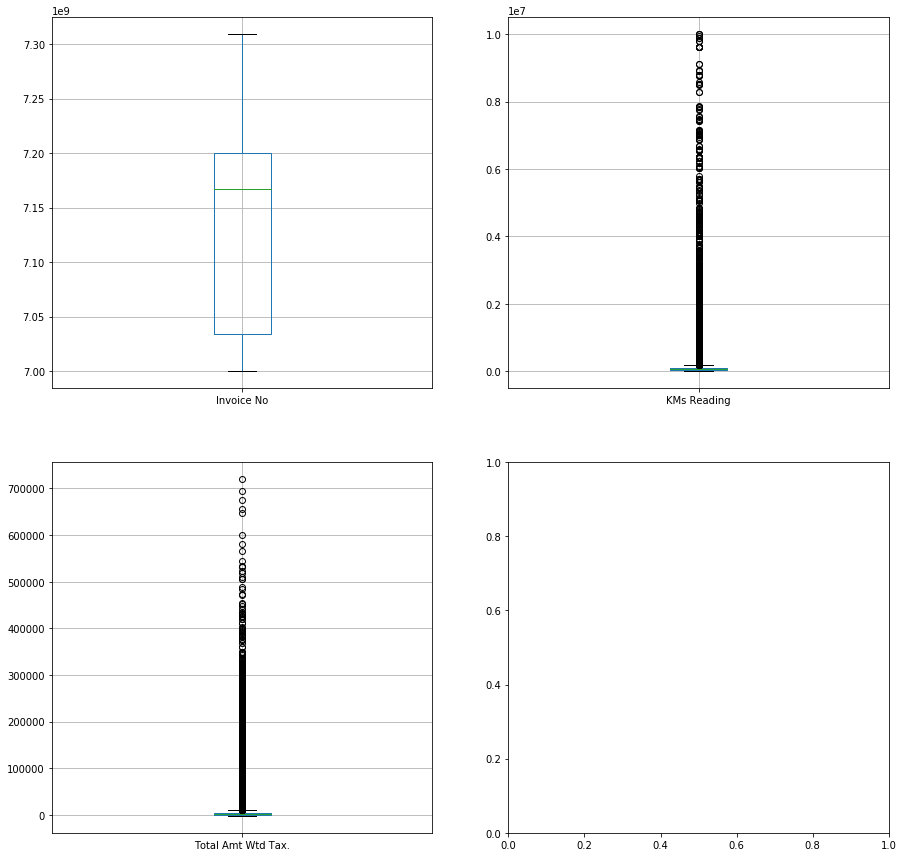

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15)) # create 2x2 array of subplots
invoice.boxplot(column='Invoice No', ax=axes[0,0]) # add boxplot to 1st subplot
invoice.boxplot(column='KMs Reading', ax=axes[0,1]) # add boxplot to 2nd subplot
invoice.boxplot(column='Total Amt Wtd Tax.', ax=axes[1,0]) # add boxplot to 2nd subplot

# etc.
plt.show()

In [0]:
# sns.boxplot(x=invoice['Parts Total'])


In [0]:
def cap_data(df):
    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.05,0.90]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

In [0]:
invoice_df=cap_data(invoice.drop(['Job Card No','ODN No.','Pin code'],1))
invoice_df[['Job Card No','ODN No.','Pin code']] = invoice[['Job Card No','ODN No.','Pin code']]

In [0]:
jtd_df = cap_data(jtd.drop(['DBM Order', 'Order Item'],1))
jtd_df[['DBM Order', 'Order Item']] = jtd[['DBM Order', 'Order Item']]

In [18]:
invoice_df['Misc Total'].value_counts()
#Order Quantity Net value

0.00       757947
50.00       17592
100.00      11929
4750.00      9849
200.00       8440
50.01        4777
49.99        4531
100.01       3376
99.99        3324
150.00       2671
300.00       2476
199.99       2027
200.01       1845
250.00       1510
197.03       1302
500.00       1282
400.00       1052
150.01        906
149.99        906
350.00        904
219.99        823
173.90        799
199.14        710
220.00        657
299.99        620
49.98         611
600.00        597
163.47        590
50.02         568
220.01        560
            ...  
1719.91         1
1239.80         1
250.96          1
367.63          1
507.96          1
1525.13         1
2169.76         1
132.39          1
982.78          1
1783.30         1
2320.19         1
4071.34         1
956.83          1
113.96          1
541.94          1
644.05          1
3910.50         1
998.04          1
2576.70         1
409.89          1
3826.32         1
580.11          1
1346.03         1
1304.89         1
998.29    

# Vehicle DF

In [19]:
vehicles_df.head()

NameError: ignored

### Missing value of Fuel type

In [0]:
vehicles_df['Fuel Type'].value_counts()

In [0]:
vehicles_df['Fuel Type'].fillna(vehicles_df['Fuel Type'].mode()[0], inplace=True)
vehicles_df = vehicles_df[vehicles_df['Fuel Type'] != 'ma3e']

In [0]:
vehicles_df['Fuel Type'] = vehicles_df['Fuel Type'].astype(int)

### Selecting vehicle model name

In [0]:
vehicles_df['Vehicle Model'] = vehicles_df['Vehicle Model'].str[2:]

### Select state Abbreviation from License Plate

In [0]:
vehicles_df['Abbreviation'] = vehicles_df['License Plate Number'].astype(str).str[:2]

### Drop rows where license plate number is less than 1 


In [0]:
mask = (vehicles_df['License Plate Number'].str.len() > 1)
#35 rows dropped
df = vehicles_df.loc[mask]

### Filter out rows where abbreviation is numbers (wrong license plate)

In [0]:
df = df[df['Abbreviation'].str.isalpha()]

# State table to map licence plate states to State Names

In [0]:
url = 'https://kb.bullseyelocations.com/support/solutions/articles/5000695302-india-state-codes'
file = pd.read_html(url, header=0)
states = file[0]
states.columns

In [0]:
states.drop(['Alternate Abbreviation'], axis=1, inplace=True)

In [0]:
states['Abbreviation'] = states['Abbreviation'].str.lower()

## Merge State and Vehicle

In [0]:
dfmerged = pd.merge(df, states, on='Abbreviation')

In [0]:
dfmerged['State Name'].value_counts()

In [0]:
p = sns.factorplot('Fuel Type',data=dfmerged,kind='count')
p.set_xticklabels(rotation=30)

In [0]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 12))
sns.countplot(x="State Name", data=dfmerged,hue='Fuel Type')
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 8.27))
sns.countplot(x="Vehicle Model", data=dfmerged, hue='Fuel Type')
plt.xlim(-1, 15)
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 8.27))
sns.countplot(x="Vehicle Model", data=dfmerged)
plt.xlim(-1, 18)
plt.xticks(rotation='vertical')
plt.show()

Which states prefers which fuel type

# Lifetime customer Value

## customer expenditures per visit

In [32]:
s = (sum(invoice_df.groupby(['Customer No.'])["Total Amt Wtd Tax."].sum()))/invoice_df.shape[0]
s

3233.1495967473793

In [0]:
s = (sum(invoice_df.groupby(['Customer No.'])["Total Amt Wtd Tax."].sum()))/502774
s

### number of visits per month (the “purchase cycle”)

In [0]:
from dateutil.relativedelta import relativedelta
from datetime import *

In [0]:

invoice_df['Invoice Date']=pd.to_datetime(invoice_df['Invoice Date'])
invoice_df['year']=invoice_df['Invoice Date'].dt.year
invoice_df['month']=invoice_df['Invoice Date'].dt.month

In [33]:
c = (invoice_df.groupby(['Customer No.'])["month"].count()).mean()
c

1.958615600647607

In [28]:
t = ((invoice_df.groupby(['Customer No.'])["Invoice Date"].max() - invoice_df.groupby(['Customer No.'])["Invoice Date"].min())/np.timedelta64(1,'M')).mean()
t

3.068531057767046

In [0]:
t

In [34]:
a = s * c
a

6332.497239416936

In [0]:
a = s * c
a

In [35]:
SLTV = (12 * a) * t
SLTV

233177.57342849937

In [0]:
SLTV = (12 * a) * t
SLTV

# Invoice

### Select top n

In [0]:
def get_top_values(dataset,col,min_percentage):
    filtered_df = dataset[col].value_counts()
    filtered_df=filtered_df.reset_index()
    filtered_df[col] = (filtered_df[col]/sum(filtered_df[col]))*100
    filtered_df = filtered_df.sort_values(col)
    filtered_df = filtered_df[filtered_df[col]>min_percentage]
    top_values  = filtered_df['index'].tolist()
    top_values_df = dataset[dataset[col].isin(top_values)]
    return top_values_df, top_values

# No payment

In [0]:
nopayment =  invoice_df[(invoice_df['Total Amt Wtd Tax.'] == 0)]

In [0]:
nopayment, topvalues = get_top_values(nopayment,'District',1.0)

In [0]:
fig, ax = plt.subplots(figsize=(15,7))
nopayment.groupby('District').count()['Order Type'].plot(ax=ax, kind='bar')
# dfmerged.groupby(cols).count()["Fuel Type"].

In [0]:
fig, ax = plt.subplots(figsize=(15,7))
nopayment.groupby('District').count()['Order Type'].plot(ax=ax, kind='bar')
# dfmerged.groupby(cols).count()["Fuel Type"].

In [0]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 8.27))
sns.countplot(x="District", data=nopayment, hue='Order Type')
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
nopayment['Make'].value_counts()

In [0]:
invoiceee.groupby('Customer No.').sum()

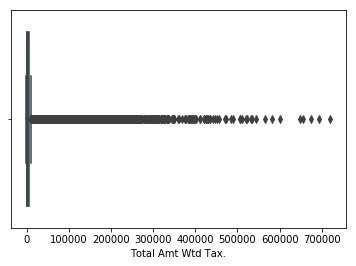

In [37]:
sns.boxplot(x=invoice['Total Amt Wtd Tax.'])

# Maps

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [0]:
!pip install pyproj==1.9.6

In [0]:
from mpl_toolkits.basemap import Basemap

In [0]:
fig = plt.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
plt.title("Mercator Projection")

In [0]:
fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',
            llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=35,lat_0=28,lon_0=77)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')

In [0]:
sample_cust = invoice_df[0:1000]

In [0]:
for index, row in sample_cust.iterrows():
    print (index, row['Model'])

In [0]:
# data = pd.DataFrame({"Apple": [False, False, False], "Banana": [False, True, False], "Carrot": [True, True, True], "Mango": [True, False, True]}, columns=["Apple", "Banana", "Carrot", "Mango"])

true_columns = []

for index, row in sample_cust.iterrows():
  true_col_list = [col for col in sample_cust.columns if row[col]]
  true_columns.append(",".join(true_col_list))

sample_cust["true_columns"] = true_columns


In [0]:
sample_cust.head().T